<a href="https://colab.research.google.com/github/HarshitManik/Matplotlib_dataset_study/blob/main/opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


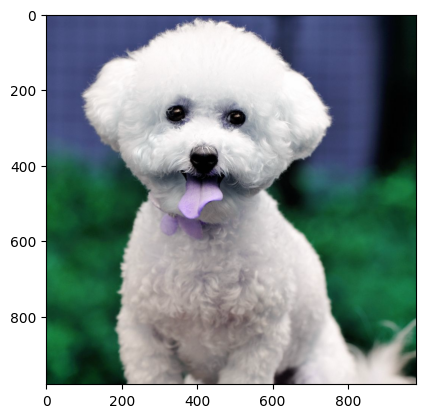

In [23]:
# open cv
# a library used to for computer vision related tasks
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread("./bichon-frise.jpg")
type(img)
img.shape
img[0]
plt.imshow(img)
img_plt=cv2.imread("./bichon-frise.jpg")
cv2.imshow("Dog name", img)
cv2.waitKey(5000)
cv2.destroyAllWindows()



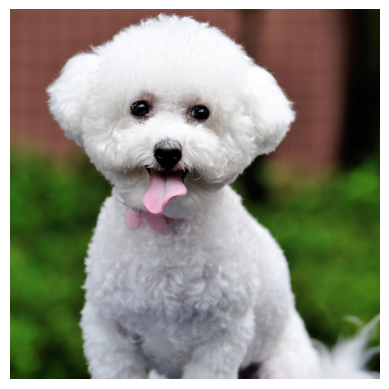

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image using OpenCV
img = cv2.imread("./bichon-frise.jpg")

# Convert the image from BGR to RGB format
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()


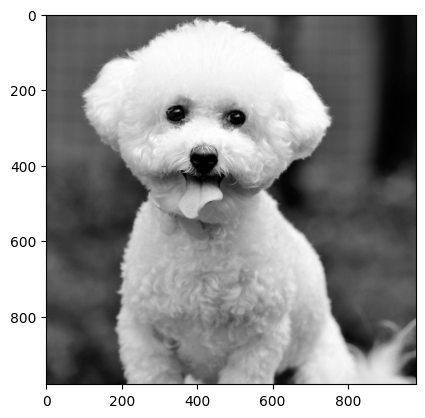

In [29]:
img_gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap="gray")

array([[[121,  72,  65],
        [122,  73,  66],
        [123,  74,  66],
        ...,
        [ 21,  30,   9],
        [ 22,  28,   8],
        [ 23,  28,   8]],

       [[121,  72,  65],
        [122,  73,  66],
        [122,  73,  66],
        ...,
        [ 20,  29,   8],
        [ 19,  27,   6],
        [ 19,  27,   6]],

       [[122,  73,  66],
        [121,  72,  65],
        [121,  72,  65],
        ...,
        [ 20,  28,   8],
        [ 18,  28,   6],
        [ 18,  28,   6]],

       ...,

       [[ 29,  48,   6],
        [ 28,  50,   7],
        [ 28,  52,   8],
        ...,
        [150, 157, 163],
        [147, 152, 158],
        [145, 150, 157]],

       [[ 27,  50,   4],
        [ 31,  53,   7],
        [ 31,  54,   8],
        ...,
        [148, 157, 164],
        [150, 157, 163],
        [153, 160, 166]],

       [[ 27,  50,   4],
        [ 30,  53,   7],
        [ 30,  53,   7],
        ...,
        [143, 152, 159],
        [151, 158, 164],
        [156, 163, 169]]], dtype=uint8)
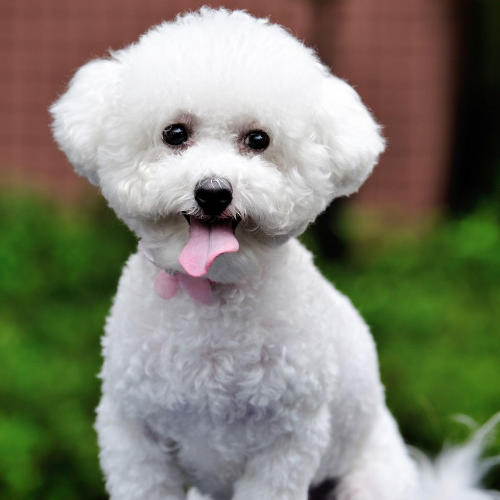

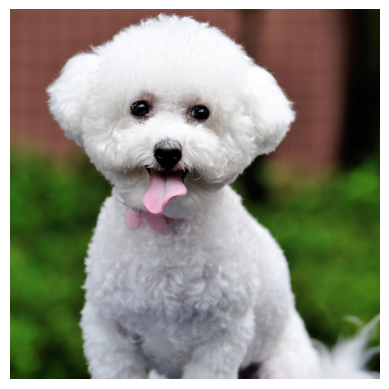

In [33]:
#resizing and blurring images
img_rgb.shape
plt.imshow(img_rgb)
plt.axis('off')
cv2.resize(img_rgb,(500,500))


array([[[ 66,  73, 122],
        [ 66,  73, 122],
        [ 66,  73, 122],
        ...,
        [  7,  28,  19],
        [  7,  28,  19],
        [  7,  28,  19]],

       [[ 66,  73, 122],
        [ 66,  73, 122],
        [ 66,  73, 122],
        ...,
        [  7,  28,  19],
        [  7,  28,  19],
        [  7,  28,  19]],

       [[ 66,  73, 122],
        [ 66,  73, 122],
        [ 66,  73, 122],
        ...,
        [  7,  28,  19],
        [  7,  28,  19],
        [  7,  28,  19]],

       ...,

       [[  7,  52,  28],
        [  7,  52,  28],
        [  7,  52,  28],
        ...,
        [157, 150, 143],
        [156, 149, 142],
        [156, 149, 142]],

       [[  7,  52,  28],
        [  7,  52,  28],
        [  7,  52,  28],
        ...,
        [157, 150, 143],
        [157, 150, 143],
        [157, 150, 143]],

       [[  7,  52,  28],
        [  7,  52,  28],
        [  7,  52,  28],
        ...,
        [158, 151, 144],
        [157, 150, 143],
        [157, 150, 143]]], dtype=uint8)
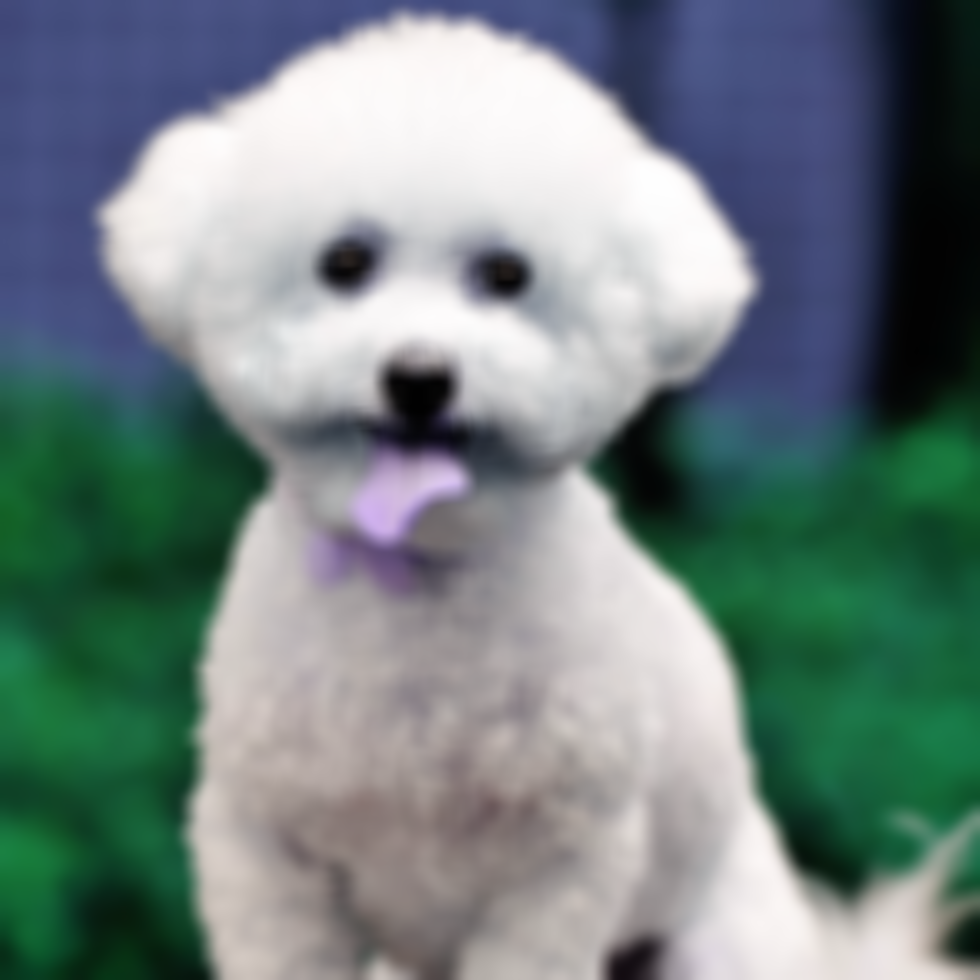

In [37]:

# if we want to blur the images
cv2.blur(img,(20,20))


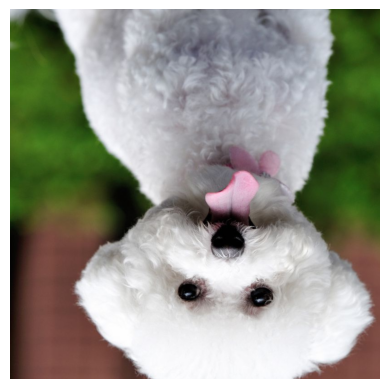

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image using OpenCV
img = cv2.imread("./bichon-frise.jpg")

# Convert the image from BGR to RGB format
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get the image dimensions (rows and cols)
rows, cols = img_rgb.shape[:-1]

# Calculate the rotation matrix
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 180, 1.2)

# Apply the affine transformation (rotation)
rotated_img = cv2.warpAffine(img_rgb, M, (cols, rows))

# Display the rotated image
plt.imshow(rotated_img)
plt.axis('off')
plt.show()


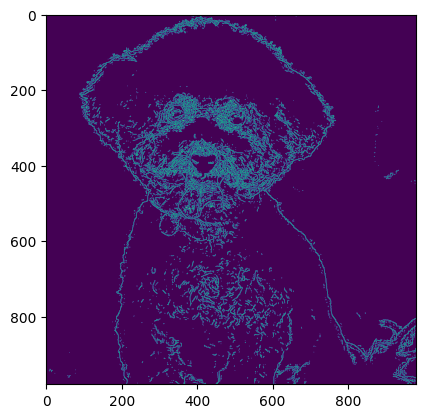

In [53]:
M=np.float32([[1,0.1,-50],[0,1,-200]])
i = cv2.warpAffine(img_rgb, M, (cols, rows))


x=cv2.Canny(img,45,45)# searches pixel block wise on the basis of the size i eneter in the brckets
plt.imshow(x)

KeyboardInterrupt: 

In [ ]:
# get the video from the web cam
import cv2

cam = cv2.VideoCapture(0)
while True:
    ret, frame = cam.read()
    if not ret:
        continue

    cv2.imshow("my_frame", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to exit
        break

cam.release()
cv2.destroyAllWindows()


In [ ]:
# Import necessary libraries
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from PIL import Image

# Function to capture webcam image
def capture_image():
    js = Javascript('''
    async function captureImage() {
        const video = document.createElement('video');
        video.style.display = 'block';
        document.body.append(video);
        await new Promise((resolve) => {
            navigator.mediaDevices.getUserMedia({video: true}).then(stream => {
                video.srcObject = stream;
                video.play();
                video.onloadedmetadata = () => resolve();
            });
        });

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);

        video.srcObject.getTracks().forEach(track => track.stop());
        video.remove();

        return canvas.toDataURL('image/jpeg', 0.8);
    }
    captureImage();
    ''')

    display(js)
    data = eval_js('captureImage()')
    binary = b64decode(data.split(',')[1])
    image = np.frombuffer(binary, dtype=np.uint8)
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

# Capture and display the image
image = capture_image()

# Convert to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using PIL
display(Image.fromarray(image_rgb))
